In [1]:
# ===========================
# Import required libraries
# ===========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import warnings
import math
import os

In [2]:
# ===========================
# LOAD MERGE DATASETS
# ===========================
df = pd.read_csv("C:/Users/khuep/Downloads/YEN/UNITS/HIT140/Assessment 3/merged_datasets_wrangle.csv")

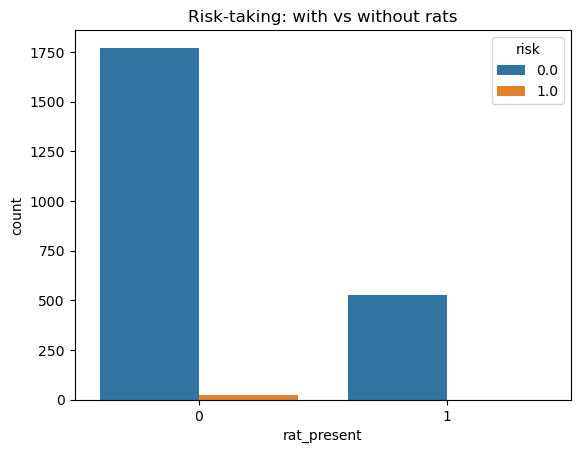

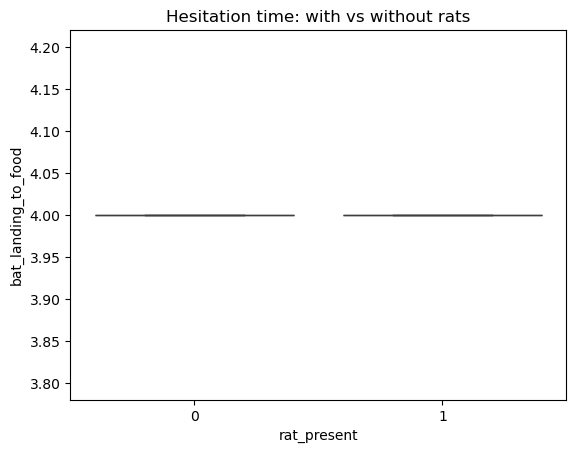

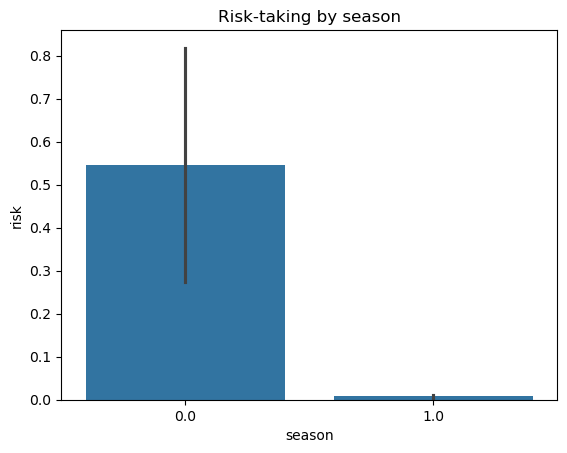

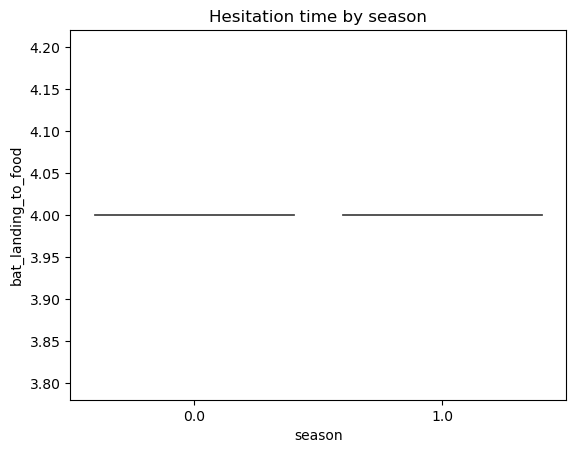

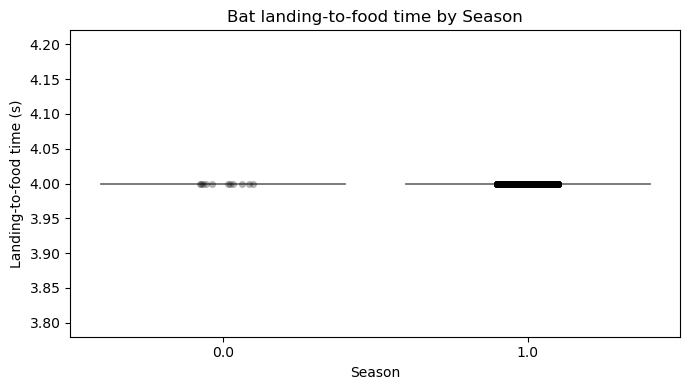

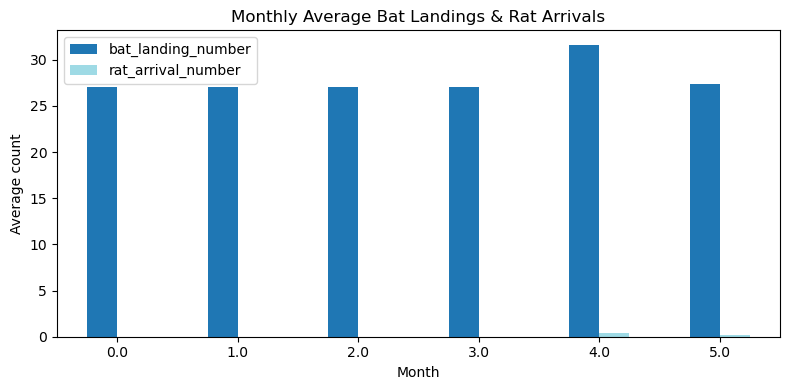

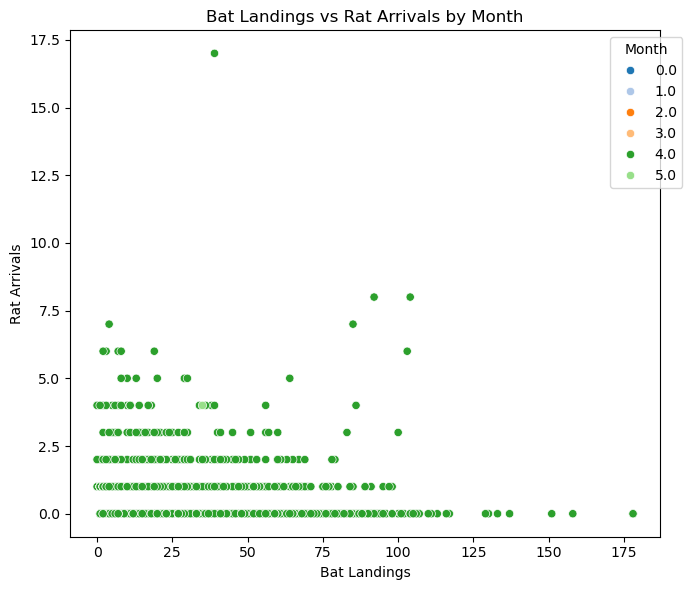

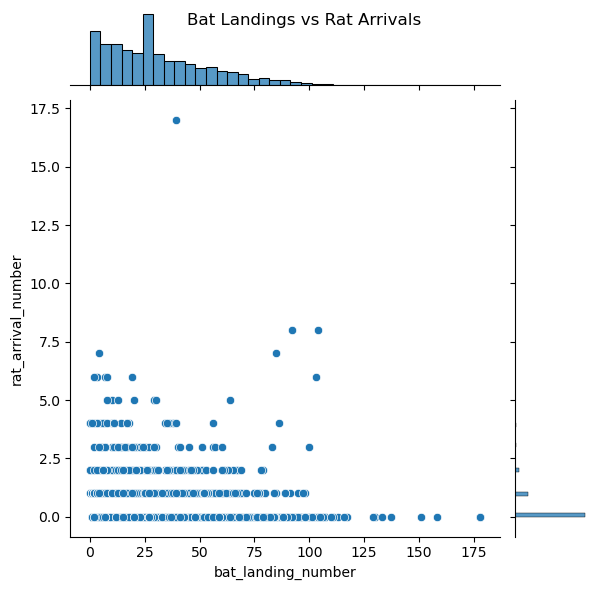

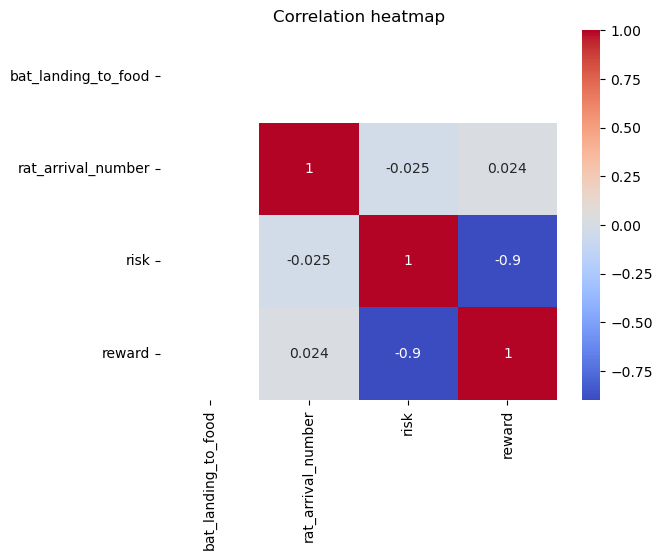

In [6]:
# ===========================
# 6. DESCRIPTIVE ANALYSIS
# ===========================
def descriptive_analysis(df):
    # ---------------------------
    # Investigation A: effect of rats
    # ---------------------------
    sns.countplot(x="rat_present", hue="risk", data=df)
    plt.title("Risk-taking: with vs without rats"); plt.show()
    
    sns.boxplot(x="rat_present", y="bat_landing_to_food", data=df)
    plt.title("Hesitation time: with vs without rats"); plt.show()
    
    # ---------------------------
    # Investigation B: seasonal effects
    # ---------------------------
    if "season" in df.columns:
        sns.barplot(x="season", y="risk", data=df, errorbar=("ci",95))
        plt.title("Risk-taking by season"); plt.show()
        sns.violinplot(x="season", y="bat_landing_to_food", data=df, inner="quartile")
        plt.title("Hesitation time by season")
        plt.show()

    # ===========================
    # Bat landing-to-food by Season
    # ===========================
    if {'bat_landing_to_food','season'}.issubset(df.columns):
        plt.figure(figsize=(7,4))
        ax2 = sns.violinplot(x='season', y='bat_landing_to_food', data=df, hue='season', palette='Set3', inner='quartile')
        sns.stripplot(x='season', y='bat_landing_to_food', data=df, color='black', alpha=0.3, jitter=True)
        plt.title("Bat landing-to-food time by Season")
        plt.xlabel("Season")
        plt.ylabel("Landing-to-food time (s)")
        plt.tight_layout()
        leg = ax2.get_legend()  # check before deleting
    if leg is not None:
        leg.remove()
        plt.show()
    
    # ---------------------------
    # Moon illumination effect
    # ---------------------------
    if "moon_illumination" in df.columns:
        sns.scatterplot(x="moon_illumination", y="bat_landing_to_food", hue="rat_present", data=df)
        plt.title("Hesitation vs Moon illumination"); plt.show()
    
    if "moon_light" in df.columns:
        sns.countplot(x="moon_light", hue="risk", data=df)
        plt.title("Risk-taking by moon brightness")
        plt.show()

    # ===========================
    # Monthly trends (Bat landings & Rat arrivals)
    # ===========================
    month_col = None
    for c in ['month_x','month','month_bat','month_rat']:
        if c in df.columns:
            month_col = c
            break

    if month_col and 'bat_landing_number' in df.columns and 'rat_arrival_number' in df.columns:
        # Monthly Average Bat Landings & Rat Arrivals
        monthly = df.groupby(month_col)[['bat_landing_number','rat_arrival_number']].mean().sort_index()
        monthly.plot(kind='bar', figsize=(8,4), rot=0, colormap='tab20')
        plt.title("Monthly Average Bat Landings & Rat Arrivals")
        plt.xlabel("Month")
        plt.ylabel("Average count")
        plt.tight_layout()
        plt.show()

        # Bat Landings vs Rat Arrivals by Month
        plt.figure(figsize=(7,6))
        sns.scatterplot(x='bat_landing_number', y='rat_arrival_number', hue=month_col, palette='tab20', data=df)
        plt.title("Bat Landings vs Rat Arrivals by Month")
        plt.xlabel("Bat Landings")
        plt.ylabel("Rat Arrivals")
        plt.legend(title="Month", bbox_to_anchor=(1.05,1))
        plt.tight_layout()
        plt.show()

        g = sns.jointplot(x='bat_landing_number', y='rat_arrival_number', data=df, kind='scatter', height=6) 
        g.figure.suptitle("Bat Landings vs Rat Arrivals", y=0.97) # đúng cách thêm title plt.show()
        plt.show()
    # ---------------------------
    # Correlation heatmap for numeric variables
    # ---------------------------
    corr_cols = ["bat_landing_to_food","rat_arrival_number","risk","reward","moon_illumination","hours_after_sunset"]
    corr_cols_exist = [c for c in corr_cols if c in df.columns]
    if corr_cols_exist:
        sns.heatmap(df[corr_cols_exist].corr(numeric_only=True), annot=True, cmap="coolwarm")
        plt.title("Correlation heatmap")
        plt.show()

descriptive_analysis(df)

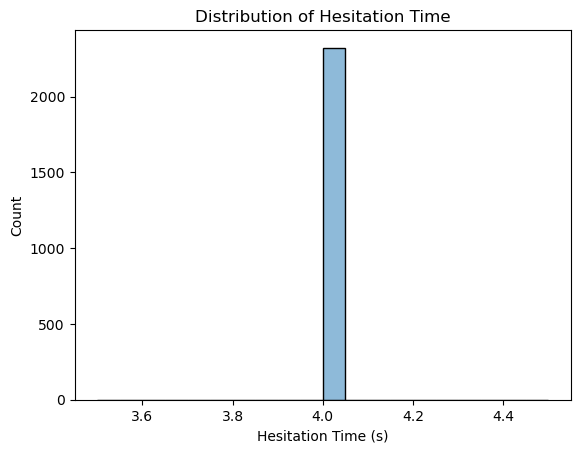

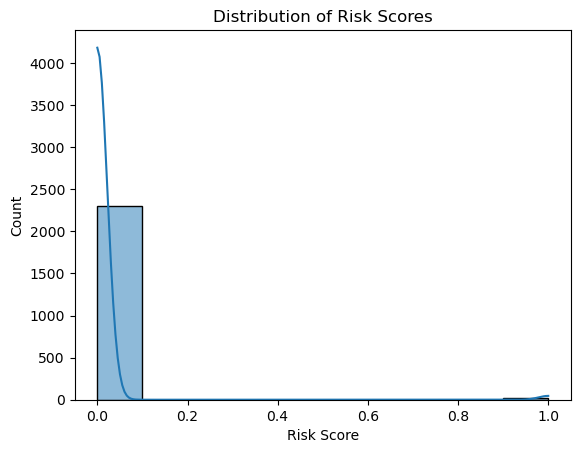

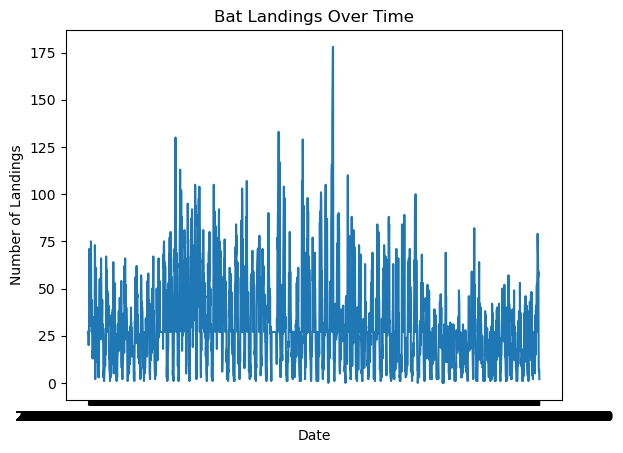

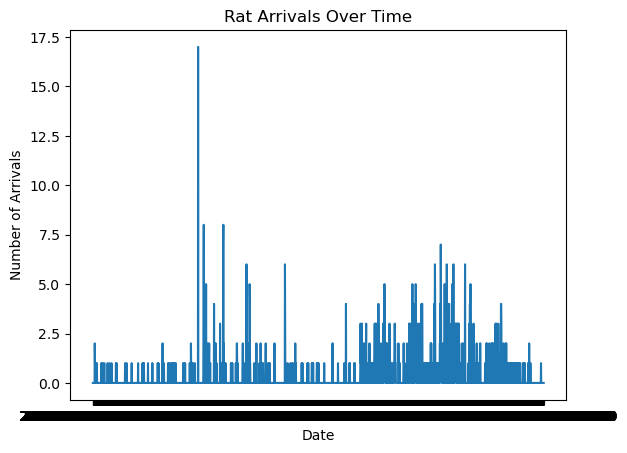

In [7]:
# ===========================
# 7. ADDITIONAL PLOTS FOR REPORT
# ===========================

# Distribution of Hesitation Time
sns.histplot(df["bat_landing_to_food"], kde=True, bins=20)
plt.title("Distribution of Hesitation Time")
plt.xlabel("Hesitation Time (s)")
plt.ylabel("Count")
plt.show()

# Distribution of Risk Scores
sns.histplot(df["risk"], bins=10, kde=True)
plt.title("Distribution of Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

# Hesitation vs Moon Light
if "moon_light" in df.columns:
    sns.boxplot(x="moon_light", y="bat_landing_to_food", data=df)
    plt.title("Hesitation Time by Moon Brightness")
    plt.show()


# Hesitation vs Rat Pressure (if available)
if "rat_pressure" in df.columns:
    sns.scatterplot(x="rat_pressure", y="bat_landing_to_food", hue="rat_present", data=df)
    plt.title("Bat Hesitation vs Rat Pressure")
    plt.show()

# Hesitation Level vs Rat Presence
if "hesitation_level" in df.columns:
    sns.countplot(x="hesitation_level", hue="rat_present", data=df)
    plt.title("Hesitation Level vs Rat Presence")
    plt.show()


# Bat Landings over Time
if "bat_landing_number" in df.columns:
    sns.lineplot(x="datetime", y="bat_landing_number", data=df)
    plt.title("Bat Landings Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Landings")
    plt.show()

# Rat Arrivals over Time
if "rat_arrival_number" in df.columns:
    sns.lineplot(x="datetime", y="rat_arrival_number", data=df)
    plt.title("Rat Arrivals Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Arrivals")
    plt.show()